In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'


In [4]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_stability_after_switch'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)

'/mnt/home/szheng/ceph/place_variability/data/paper'

In [5]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

In [6]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all = prepped_data_agg['var_res_all']
corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']



ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])

ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 

In [7]:
# load metrics
import pickle
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

In [9]:
import stability_analysis as sa
reload(sa)

<module 'stability_analysis' from '/mnt/home/szheng/projects/place_variability/code/stability_analysis.py'>

# stability after pop up

### no switch aligned to middle of session

peak std
                peak_std
has_sw isnovel          
nosw   0        2.049390
       1        2.408319
sw     0        1.643168
       1        1.949359
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_0 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:3.693e-01 U_stat=3.711e+04


/mnt/home/szheng/projects/place_variability/code/stability_analysis.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_sw_int'] = data['has_sw'].apply(lambda x:{'nosw':0,'sw':1}[x])


0_0 vs. 0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.271e-08 U_stat=1.407e+06
0_0 vs. 1_0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.722e-02 U_stat=4.672e+05
0_1 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.697e-04 U_stat=7.460e+04
fr_peak cv
                fr_peak_cv
has_sw isnovel            
nosw   0          0.365340
       1          0.373115
sw     0          0.283310
       1          0.332031
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_0 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.880e-02 U_stat=3.971e+04


/mnt/home/szheng/projects/place_variability/code/stability_analysis.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_sw_int'] = data['has_sw'].apply(lambda x:{'nosw':0,'sw':1}[x])


0_0 vs. 0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.602e-29 U_stat=1.566e+06
0_0 vs. 1_0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.906e-01 U_stat=4.731e+05
0_1 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.778e-05 U_stat=7.253e+04


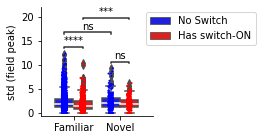

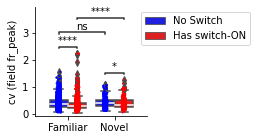

In [15]:
nosw_start_trial = 2
nosw_start_frac = 0.5#None
ntrials_pre_sw=0
ntrials_after_sw=5

si_thresh = 0.5
savefig = False#True#False#
random_start =None

for par_key,var_func in [['peak','std'],['fr_peak','cv']]:
    
    par_var_nosw_sw_df,par_nosw_sw_df = sa.get_sw_no_sw_pf_par_var_control_ntrial(changes_df_all,pf_params_recombined_all,par_key=par_key,var_func=var_func,min_size=nosw_start_trial,nosw_start_frac=nosw_start_frac,
                                                                                  random_start=random_start,
                                                                                  nosw_start_pre_peak=False,nosw_start_pre_min=False,ntrials_after_sw=ntrials_after_sw,ntrials_pre_sw=ntrials_pre_sw)
    print(par_key,var_func)
    print(par_var_nosw_sw_df.groupby(['has_sw','isnovel']).median())
    sa.plot_strip_box(par_var_nosw_sw_df,per_field_metrics_all,
        par_key = par_key,
        var_func=var_func,
        random_start = random_start,
        nosw_start_pre_peak = False,
        nosw_start_pre_min=False,
        nosw_start_frac=nosw_start_frac,
        si_thresh=si_thresh,
        savefig=savefig,
        figdir=figdir,
        ntrials_after_sw=ntrials_after_sw,
        figsize=(2,2)    
        )

In [14]:
par_var_nosw_sw_df.groupby(['has_sw','isnovel']).median()

fr_peak_cv
has_sw isnovel            
nosw   0          0.365340
       1          0.373115
sw     0          0.283310
       1          0.332031

In [13]:
par_var_nosw_sw_df.groupby(['has_sw','isnovel']).count()

fr_peak_cv
has_sw isnovel            
nosw   0              6852
       1               820
sw     0              1230
       1               402

### no switch aligned to start of session

peak std
                peak_std
has_sw isnovel          
nosw   0        2.280351
       1        2.683282
sw     0        1.643168
       1        1.949359
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_0 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.904e-06 U_stat=4.667e+04


/mnt/home/szheng/projects/place_variability/code/stability_analysis.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_sw_int'] = data['has_sw'].apply(lambda x:{'nosw':0,'sw':1}[x])


0_0 vs. 0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:6.933e-27 U_stat=1.574e+06
0_0 vs. 1_0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.386e-03 U_stat=4.821e+05
0_1 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.697e-04 U_stat=7.460e+04
fr_peak cv
                fr_peak_cv
has_sw isnovel            
nosw   0          0.402153
       1          0.458168
sw     0          0.283310
       1          0.332031
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_0 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:5.339e-12 U_stat=5.085e+04


/mnt/home/szheng/projects/place_variability/code/stability_analysis.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_sw_int'] = data['has_sw'].apply(lambda x:{'nosw':0,'sw':1}[x])


0_0 vs. 0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.443e-59 U_stat=1.733e+06
0_0 vs. 1_0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.330e-06 U_stat=4.503e+05
0_1 vs. 1_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.778e-05 U_stat=7.253e+04


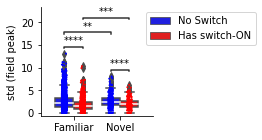

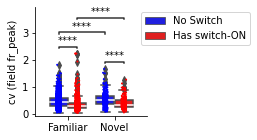

In [16]:
nosw_start_trial = 0
nosw_start_frac = 0#None
ntrials_pre_sw=0
ntrials_after_sw=5

si_thresh = 0.5
savefig = False#True#False#
random_start =None

for par_key,var_func in [['peak','std'],['fr_peak','cv']]:
    
    par_var_nosw_sw_df,par_nosw_sw_df = sa.get_sw_no_sw_pf_par_var_control_ntrial(changes_df_all,pf_params_recombined_all,par_key=par_key,var_func=var_func,min_size=nosw_start_trial,nosw_start_frac=nosw_start_frac,
                                                                                  random_start=random_start,
                                                                                  nosw_start_pre_peak=False,nosw_start_pre_min=False,ntrials_after_sw=ntrials_after_sw,ntrials_pre_sw=ntrials_pre_sw)

    print(par_key,var_func)
    print(par_var_nosw_sw_df.groupby(['has_sw','isnovel']).median())
    sa.plot_strip_box(par_var_nosw_sw_df,per_field_metrics_all,
        par_key = par_key,
        var_func=var_func,
        random_start = random_start,
        nosw_start_pre_peak = False,
        nosw_start_pre_min=False,
        nosw_start_frac=nosw_start_frac,
        si_thresh=si_thresh,
        savefig=savefig,
        figdir=figdir,  
        ntrials_after_sw=ntrials_after_sw,
        figsize=(2,2)    
        )

# position shift after pop up

In [23]:
### no switch aligned to start of session

/mnt/home/szheng/ceph/place_variability/fig/paper/figure_stability_after_switch/peak_drift_vs_trial_ntrials_after_sw_5_si_thresh_5e-01_noswstartfrac_0e+00.png  saved!
/mnt/home/szheng/ceph/place_variability/fig/paper/figure_stability_after_switch/peak_drift_vs_trial_ntrials_after_sw_5_si_thresh_5e-01_noswstartfrac_0e+00.svg  saved!
CPU times: user 9.19 s, sys: 47.8 ms, total: 9.24 s
Wall time: 9.25 s


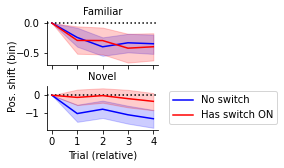

In [44]:
%%time
reload(sa)
nosw_start_trial = 0#2
par_key='peak'
var_func = 'std'
nosw_start_frac = 0#None
ntrials_pre_sw=0
ntrials_after_sw=5

si_thresh = 0.5
savefig = True#False

nosw_start_pre_peak=False
nosw_start_pre_min=False
random_start =None




par_var_nosw_sw_df,par_nosw_sw_df = sa.get_sw_no_sw_pf_par_var_control_ntrial(changes_df_all,pf_params_recombined_all,par_key=par_key,var_func=var_func,min_size=nosw_start_trial,nosw_start_frac=nosw_start_frac,
                                                                              random_start=random_start,
                                                                              nosw_start_pre_peak=nosw_start_pre_peak,nosw_start_pre_min=nosw_start_pre_min,ntrials_after_sw=ntrials_after_sw,ntrials_pre_sw=ntrials_pre_sw)


sa.plot_drift_trace(par_nosw_sw_df,per_field_metrics_all,trial_ind_relative=0,
                     si_thresh=si_thresh,
                     nosw_start_pre_peak=nosw_start_pre_peak,
                    nosw_start_pre_min=nosw_start_pre_min,
                     random_start = random_start,
                    ntrials_after_sw=ntrials_after_sw,
                    nosw_start_frac=nosw_start_frac,
                     savefig=savefig,
                     figdir=figdir,figsize=(2,2)
                    )



### no switch aligned to middle of session

/mnt/home/szheng/ceph/place_variability/fig/paper/figure_stability_after_switch/peak_drift_vs_trial_ntrials_after_sw_5_si_thresh_5e-01_noswstartfrac_5e-01.png  saved!
/mnt/home/szheng/ceph/place_variability/fig/paper/figure_stability_after_switch/peak_drift_vs_trial_ntrials_after_sw_5_si_thresh_5e-01_noswstartfrac_5e-01.svg  saved!
CPU times: user 9.28 s, sys: 43.6 ms, total: 9.33 s
Wall time: 9.34 s


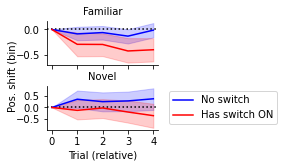

In [46]:
%%time
reload(sa)
nosw_start_trial = 2
par_key='peak'
var_func = 'std'
nosw_start_frac = 0.5#None
ntrials_pre_sw=0
ntrials_after_sw=5

si_thresh = 0.5
savefig = True#False

nosw_start_pre_peak=False
nosw_start_pre_min=False
random_start =None




par_var_nosw_sw_df,par_nosw_sw_df = sa.get_sw_no_sw_pf_par_var_control_ntrial(changes_df_all,pf_params_recombined_all,par_key=par_key,var_func=var_func,min_size=nosw_start_trial,nosw_start_frac=nosw_start_frac,
                                                                              random_start=random_start,
                                                                              nosw_start_pre_peak=nosw_start_pre_peak,nosw_start_pre_min=nosw_start_pre_min,ntrials_after_sw=ntrials_after_sw,ntrials_pre_sw=ntrials_pre_sw)


sa.plot_drift_trace(par_nosw_sw_df,per_field_metrics_all,trial_ind_relative=0,
                     si_thresh=si_thresh,
                     nosw_start_pre_peak=nosw_start_pre_peak,
                    nosw_start_pre_min=nosw_start_pre_min,
                     random_start = random_start,
                    ntrials_after_sw=ntrials_after_sw,
                    nosw_start_frac=nosw_start_frac,
                     savefig=savefig,
                    figdir=figdir
                    )



# examples

In [47]:
figdirsupp = misc.get_or_create_subdir(figdir,'drift_examples')

In [52]:
reload(sa)

<module 'stability_analysis' from '/mnt/home/szheng/projects/place_variability/code/stability_analysis.py'>

In [76]:
nosw_start_trial = 0
par_key='com'#'peak'#
var_func = 'std'
nosw_start_frac = 0
ntrials_pre_sw=0
ntrials_after_sw=5

si_thresh = 0.5



random_start=None
nosw_start_pre_peak=True
nosw_start_pre_min=False
par_var_nosw_sw_df,par_nosw_sw_df = sa.get_sw_no_sw_pf_par_var_control_ntrial(changes_df_all,pf_params_recombined_all,par_key=par_key,var_func=var_func,min_size=nosw_start_trial,nosw_start_frac=nosw_start_frac,
                                                                                  random_start=random_start,
                                                                                  nosw_start_pre_peak=nosw_start_pre_peak,nosw_start_pre_min=nosw_start_pre_min,ntrials_after_sw=ntrials_after_sw,ntrials_pre_sw=ntrials_pre_sw)

data=sa.get_relative_trace_filter_by_si(par_nosw_sw_df,per_field_metrics_all,trial_ind_relative=0,si_thresh=0.5,drift_thresh=10)

ani='e13_26m1'
sess='e13_26m1_211019'#'e15_13f1_220117'

/tmp/ipykernel_1233703/1816353002.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_sub=data.loc['sw',ani,sess,task_ind]
/tmp/ipykernel_1233703/1816353002.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.
  sw_trial=all_sw_d_all.loc[ani,sess,task_ind].query('trialtype==@tt&uid==@uid&field_index==@field_id')['index_within'].iloc[0]
/tmp/ipykernel_1233703/1816353002.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.
  fig,ax=ph.ratemap_one_raw(fr_map_trial_df_all.loc[ani,sess,task_ind,ttr,uid].T.dropna(axis=0,how='all'),
/mnt/home/szheng/projects/util_code/plot_helper.py:575: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)


0    0.000000
1   -3.596725
2   -2.482060
3   -2.203636
4   -5.817483
Name: (1.0, 51, 1), dtype: float64


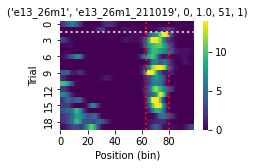

In [96]:
task_ind=0
data_sub=data.loc['sw',ani,sess,task_ind]
ma=data_sub.loc[:,1:2].mean(axis=1) <-2

ii_l = [1]#[0,4,5]

savefig = True

for ii in ii_l:
    row=data_sub.loc[ma].iloc[ii]
#     task_ind,tt,uid,field_id=row.name
    tt,uid,field_id=row.name

    print(row)
    if tt=='both':
        ttr=0
    else:
        ttr=tt

    field_bound = all_fields_recombined_all.loc[ani,sess,task_ind,tt,uid,field_id][['start','end']]
    sw_trial=all_sw_d_all.loc[ani,sess,task_ind].query('trialtype==@tt&uid==@uid&field_index==@field_id')['index_within'].iloc[0]
    fig,ax=ph.ratemap_one_raw(fr_map_trial_df_all.loc[ani,sess,task_ind,ttr,uid].T.dropna(axis=0,how='all'),
                       trial=sw_trial,field_bound=field_bound,
                      )
    ax.set_title((ani,sess,task_ind,tt,uid,field_id))
#     xticks=np.arange(0,99,10)
#     ax.set_xticks(xticks)
#     ax.set_xticklabels(xticks)
    ax.set(xlabel='Position (bin)',ylabel='Trial')
    if savefig:
        fn_full = f'swex_{sess}_task{int(task_ind)}_tt{tt}_uid{uid}_field{field_id}'
        ph.save_given_name(fig,fn_full,figdirsupp)

# ax.set_ylim([sw_trial+5,sw_trial-1])
# ax.set_xlim([field_bound[0]-20,field_bound[1]+20])

/tmp/ipykernel_1233703/4205583204.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_sub=data.loc['nosw',ani,sess,task_ind]
/tmp/ipykernel_1233703/4205583204.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.
  fig,ax=ph.ratemap_one_raw(fr_map_trial_df_all.loc[ani,sess,task_ind,ttr,uid].T.dropna(axis=0,how='all'),
/mnt/home/szheng/projects/util_code/plot_helper.py:575: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)


0    0.000000
1   -1.833218
2   -2.945593
3   -0.321254
4   -1.166726
Name: (1.0, 270, 1), dtype: float64


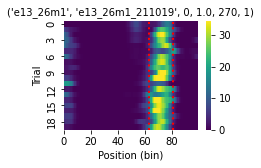

In [97]:
task_ind=0
data_sub=data.loc['nosw',ani,sess,task_ind]
ma=data_sub.loc[:,1:2].mean(axis=1) <-2

ii_l = [3]#[0,4,5]

savefig = True

for ii in ii_l:
    row=data_sub.loc[ma].iloc[ii]
#     task_ind,tt,uid,field_id=row.name
    tt,uid,field_id=row.name

    print(row)
    if tt=='both':
        ttr=0
    else:
        ttr=tt

    field_bound = all_fields_recombined_all.loc[ani,sess,task_ind,tt,uid,field_id][['start','end']]
#     sw_trial=all_sw_d_all.loc[ani,sess,task_ind].query('trialtype==@tt&uid==@uid&field_index==@field_id')['index_within'].iloc[0]
    fig,ax=ph.ratemap_one_raw(fr_map_trial_df_all.loc[ani,sess,task_ind,ttr,uid].T.dropna(axis=0,how='all'),
                    field_bound=field_bound,
                      )
    ax.set_title((ani,sess,task_ind,tt,uid,field_id))
#     xticks=np.arange(0,99,10)
#     ax.set_xticks(xticks)
#     ax.set_xticklabels(xticks)
    ax.set(xlabel='Position (bin)',ylabel='Trial')
    if savefig:
        fn_full = f'noswex_{sess}_task{int(task_ind)}_tt{tt}_uid{uid}_field{field_id}'
        ph.save_given_name(fig,fn_full,figdirsupp)

# ax.set_ylim([sw_trial+5,sw_trial-1])
# ax.set_xlim([field_bound[0]-20,field_bound[1]+20])